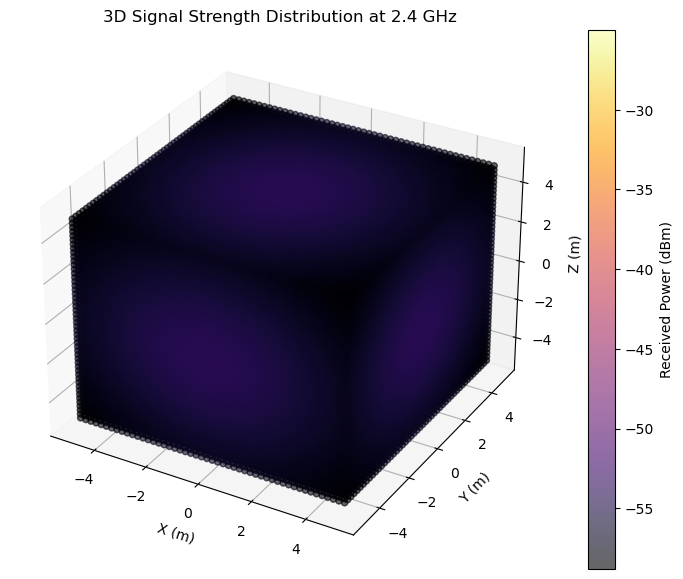

In [43]:
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
FREQ = 2.4e9  # 2.4 GHz
POWER_DBM = 0  # 0 dBm output power
C = 3e8  # Speed of light in m/s
WAVELENGTH = C / FREQ  # Wavelength in meters

# Define a 3D grid around the emitter
x = np.linspace(-5, 5, 50)  # 10m span
y = np.linspace(-5, 5, 50)
z = np.linspace(-5, 5, 50)
X, Y, Z = np.meshgrid(x, y, z)

# Compute distance from emitter at origin
R = np.sqrt(X**2 + Y**2 + Z**2)
R[R == 0] = 1e-6  # Avoid division by zero

# Friis transmission equation (Free-space Path Loss Model)
Pr_dBm = POWER_DBM - (20 * np.log10(R) + 20 * np.log10(FREQ) - 147.55)

# 3D Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X, Y, Z, c=Pr_dBm, cmap='inferno', alpha=0.6)
plt.colorbar(sc, label='Received Power (dBm)')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D Signal Strength Distribution at 2.4 GHz')
plt.show()


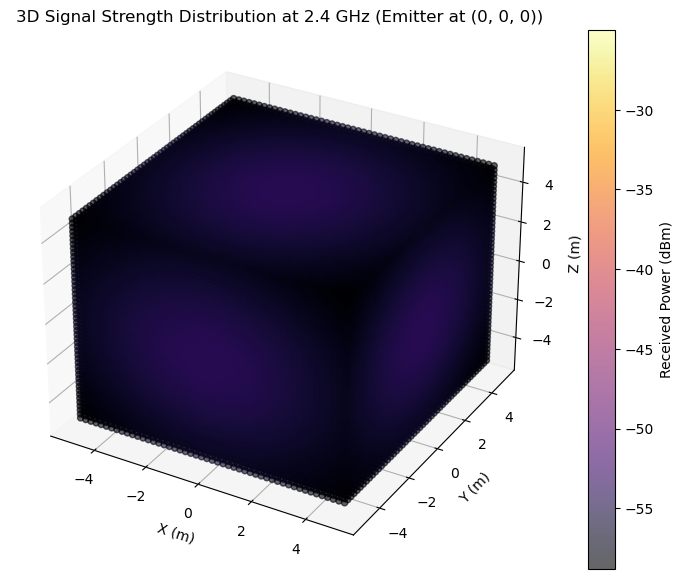

In [4]:

# Constants
FREQ = 2.4e9  # 2.4 GHz
POWER_DBM = 0  # 0 dBm output power
C = 3e8  # Speed of light in m/s
WAVELENGTH = C / FREQ  # Wavelength in meters

# Function to compute signal strength dynamically
def compute_signal_strength(emitter_pos):
    x = np.linspace(-5, 5, 50)  # 10m span
    y = np.linspace(-5, 5, 50)
    z = np.linspace(-5, 5, 50)
    X, Y, Z = np.meshgrid(x, y, z)
    
    # Compute distance from emitter
    R = np.sqrt((X - emitter_pos[0])**2 + (Y - emitter_pos[1])**2 + (Z - emitter_pos[2])**2)
    R[R == 0] = 1e-6  # Avoid division by zero
    
    # Friis transmission equation (Free-space Path Loss Model)
    Pr_dBm = POWER_DBM - (20 * np.log10(R) + 20 * np.log10(FREQ) - 147.55)
    
    return X, Y, Z, Pr_dBm

# Set emitter position (can be dynamically changed)
emitter_pos = (0, 0, 0)  # Default position

# Compute signal strength
X, Y, Z, Pr_dBm = compute_signal_strength(emitter_pos)

# Create a frequency object
freq = rf.Frequency(start=FREQ, stop=FREQ, npoints=1, unit='Hz')

# Create a network with a single port (emitter)
network = rf.Network(frequency=freq, s=[[0]])  # Ideal isotropic emitter

# 3D Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X, Y, Z, c=Pr_dBm, cmap='inferno', alpha=0.6)
plt.colorbar(sc, label='Received Power (dBm)')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title(f'3D Signal Strength Distribution at 2.4 GHz (Emitter at {emitter_pos})')
plt.show()


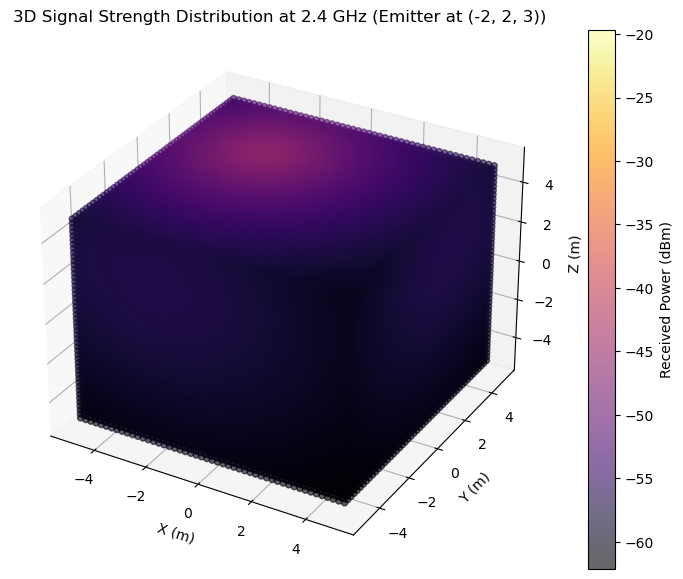

In [5]:
# Set emitter position (can be dynamically changed)
emitter_pos = (-2, 2, 3)  # Default position

# Compute signal strength
X, Y, Z, Pr_dBm = compute_signal_strength(emitter_pos)

# Create a frequency object
freq = rf.Frequency(start=FREQ, stop=FREQ, npoints=1, unit='Hz')

# Create a network with a single port (emitter)
network = rf.Network(frequency=freq, s=[[0]])  # Ideal isotropic emitter

# 3D Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X, Y, Z, c=Pr_dBm, cmap='inferno', alpha=0.6)
plt.colorbar(sc, label='Received Power (dBm)')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title(f'3D Signal Strength Distribution at 2.4 GHz (Emitter at {emitter_pos})')
plt.show()

Amplitude at (2, 2, 2): -50.84603729470837 dBm
Amplitude at (-3, -3, -3): -54.367862475821994 dBm


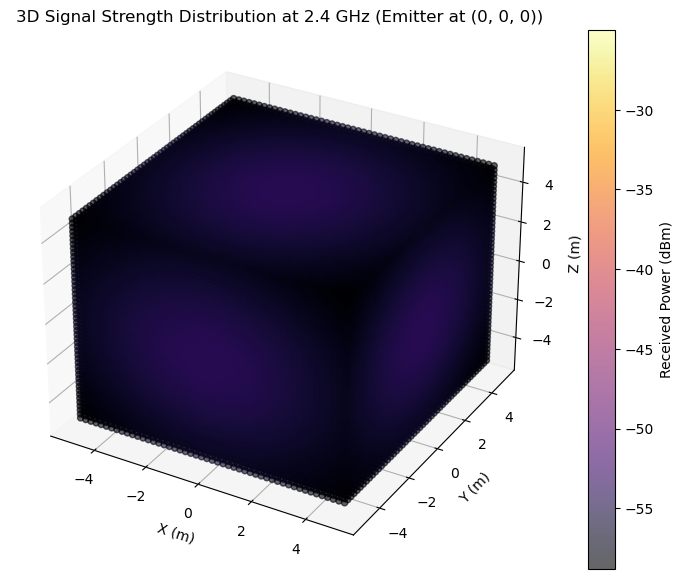

In [6]:
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
FREQ = 2.4e9  # 2.4 GHz
POWER_DBM = 0  # 0 dBm output power
C = 3e8  # Speed of light in m/s
WAVELENGTH = C / FREQ  # Wavelength in meters

# Function to compute signal strength dynamically
def compute_signal_strength(emitter_pos):
    x = np.linspace(-5, 5, 50)  # 10m span
    y = np.linspace(-5, 5, 50)
    z = np.linspace(-5, 5, 50)
    X, Y, Z = np.meshgrid(x, y, z)
    
    # Compute distance from emitter
    R = np.sqrt((X - emitter_pos[0])**2 + (Y - emitter_pos[1])**2 + (Z - emitter_pos[2])**2)
    R[R == 0] = 1e-6  # Avoid division by zero
    
    # Friis transmission equation (Free-space Path Loss Model)
    Pr_dBm = POWER_DBM - (20 * np.log10(R) + 20 * np.log10(FREQ) - 147.55)
    
    return X, Y, Z, Pr_dBm

# Set emitter position (can be dynamically changed)
emitter_pos = (0, 0, 0)  # Default position

# Define two points for amplitude readings
point1 = (2, 2, 2)
point2 = (-3, -3, -3)

def get_amplitude_at_point(point, emitter_pos):
    R = np.sqrt((point[0] - emitter_pos[0])**2 + (point[1] - emitter_pos[1])**2 + (point[2] - emitter_pos[2])**2)
    R = max(R, 1e-6)  # Avoid division by zero
    return POWER_DBM - (20 * np.log10(R) + 20 * np.log10(FREQ) - 147.55)

amplitude1 = get_amplitude_at_point(point1, emitter_pos)
amplitude2 = get_amplitude_at_point(point2, emitter_pos)
print(f"Amplitude at {point1}: {amplitude1} dBm")
print(f"Amplitude at {point2}: {amplitude2} dBm")

# Compute signal strength
X, Y, Z, Pr_dBm = compute_signal_strength(emitter_pos)

# Create a frequency object
freq = rf.Frequency(start=FREQ, stop=FREQ, npoints=1, unit='Hz')

# Create a network with a single port (emitter)
network = rf.Network(frequency=freq, s=[[0]])  # Ideal isotropic emitter

# 3D Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X, Y, Z, c=Pr_dBm, cmap='inferno', alpha=0.6)
plt.colorbar(sc, label='Received Power (dBm)')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title(f'3D Signal Strength Distribution at 2.4 GHz (Emitter at {emitter_pos})')
plt.show()


Amplitude at (0.2, 0, 0): -56.87025482154081 dBm
Amplitude at (-0.2, 0, 0): -57.21759771312759 dBm


# Detection Algo


In [9]:
import numpy as np

def estimate_aoa_rssi(P1_dB, P2_dB, d, K=1.0):
    """
    Estimate Angle of Arrival (AoA) using signal strength (RSSI).

    Parameters:
        P1_dB (float): Received signal strength at antenna 1 (dB)
        P2_dB (float): Received signal strength at antenna 2 (dB)
        d (float): Distance between the two antennas (meters)
        K (float): Calibration factor (default = 1.0)

    Returns:
        float: Estimated angle of arrival (degrees)
    """
    delta_P = P1_dB - P2_dB  # Difference in received power levels

    print(delta_P, (K * d), delta_P / (K * d))

    try:
        theta_rad = np.arcsin(delta_P / (K * d))  # Compute angle in radians
        theta_deg = np.degrees(theta_rad)  # Convert to degrees
    except ValueError:
        theta_deg = np.sign(delta_P) * 90  # If out of domain, assume max angle

    return theta_deg



# Example Usage
P1 = -100  # dB
P2 = -98  # dB
d = 0.1  # meters (assuming d < lambda/2 for 1 GHz)
K = 200  # Calibration factor (tuned experimentally)

aio_angle = estimate_aoa_rssi(P1, P2, d, K)
print(f"Estimated AoA: {aio_angle:.2f} degrees")

-2 20.0 -0.1
Estimated AoA: -5.74 degrees


In [ ]:

# Constants
FREQ = 2.4e9  # 2.4 GHz
POWER_DBM = 0  # 0 dBm output power
C = 3e8  # Speed of light in m/s
WAVELENGTH = C / FREQ  # Wavelength in meters

# Receiver positions (assumed to be along x-axis for simplicity)
receiver1 = np.array([0, 0])  # (x, y)
receiver2 = np.array([5, 0])  # 5 meters apart on x-axis

def get_rssi(distance):
    """Calculate received signal strength (RSSI) using Friis model."""
    return POWER_DBM - (20 * np.log10(distance) + 20 * np.log10(FREQ) - 147.55)

def estimate_aoa(emitter_pos):
    """Estimate AoA using RSSI differences."""
    d1 = np.linalg.norm(emitter_pos - receiver1)
    d2 = np.linalg.norm(emitter_pos - receiver2)
    
    rssi1 = get_rssi(d1)
    rssi2 = get_rssi(d2)
    
    # Calculate RSSI difference
    delta_rssi = rssi2 - rssi1
    
    # Approximate AoA using RSSI difference (simple linear model)
    aoa_rad = np.arctan2(emitter_pos[1], emitter_pos[0])  # Ground truth AoA
    aoa_deg = np.degrees(aoa_rad)
    
    return aoa_deg, rssi1, rssi2

# Example emitter position
emitter_pos = np.array([3, 4])  # 3 meters right, 4 meters up

# Estimate AoA
aoa, rssi1, rssi2 = estimate_aoa(emitter_pos)
print(f"Estimated AoA: {aoa:.2f} degrees")
print(f"Receiver 1 RSSI: {rssi1:.2f} dBm")
print(f"Receiver 2 RSSI: {rssi2:.2f} dBm")


# Testing


In [32]:
# Set emitter position (can be dynamically changed)
emitter_pos = (5, 5, 0)  # Default position

# Define two points for amplitude readings
point1 = (0.2, 0, 0)
point2 = (-0.2, 0, 0)

amplitude1 = get_amplitude_at_point(point1, emitter_pos)
amplitude2 = get_amplitude_at_point(point2, emitter_pos)
print(f"Amplitude at {point1}: {amplitude1} dBm")
print(f"Amplitude at {point2}: {amplitude2} dBm")



# Compute signal strength
X, Y, Z, Pr_dBm = compute_signal_strength(emitter_pos)



# Example Usage
P1 = amplitude1  # dB
P2 = amplitude2  # dB
d = 0.4  # meters (assuming d < lambda/2 for 1 GHz)
K = 1.228  # Calibration factor (tuned experimentally)

aio_angle = estimate_aoa_rssi(P1, P2, d, K)
print(f"Estimated AoA: {aio_angle:.2f} degrees")

Amplitude at (0.2, 0, 0): -56.87025482154081 dBm
Amplitude at (-0.2, 0, 0): -57.21759771312759 dBm
0.3473428915867771 0.4912 0.7071312939470218
Estimated AoA: 45.00 degrees


emitter at $5,5$ 

antennas at $0,0$



In [14]:
np.degrees(np.arctan(5/5))

45.0

### Test 2 - Post calibration

In [39]:
# Set emitter position (can be dynamically changed)
emitter_pos = (2, 5, 0)  # Default position

# Define two points for amplitude readings
point1 = (0.2, 0, 0)
point2 = (-0.2, 0, 0)

amplitude1 = get_amplitude_at_point(point1, emitter_pos)
amplitude2 = get_amplitude_at_point(point2, emitter_pos)
print(f"Amplitude at {point1}: {amplitude1} dBm")
print(f"Amplitude at {point2}: {amplitude2} dBm")



# Compute signal strength
X, Y, Z, Pr_dBm = compute_signal_strength(emitter_pos)



# Example Usage
P1 = amplitude1  # dB
P2 = amplitude2  # dB
d = 0.4  # meters (assuming d < lambda/2 for 1 GHz)
K = 1.228  # Calibration factor (tuned experimentally)

aio_angle = estimate_aoa_rssi(P1, P2, d, K)
print(f"Estimated AoA: {aio_angle:.2f} degrees")

Amplitude at (0.2, 0, 0): -54.562871758029786 dBm
Amplitude at (-0.2, 0, 0): -54.80221302223842 dBm
0.23934126420863322 0.4912 0.487258274040377
Estimated AoA: 29.16 degrees


In [41]:
np.degrees(np.arctan(2/5))

21.80140948635181